In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import warnings; warnings.simplefilter('ignore')

# Random Graphs

Draw random Delaunay triangulations

In [3]:
from graphs import draw_graph, random_delaunay, random_realization
from matplotlib import pyplot as plt
import numpy as np

def draw_random_graph( g, s, t, pos, hidden_state, realization, cut, pruned, ax=None, with_removed=False):
    if ax is None:
        ax = plt.subplot(111)
    hidden_edges = {l[0]: k for l, k in zip(hidden_state, realization)}
    if with_removed:
        removed_edges = list(cut.edges()) + list(pruned.edges())
    else:
        removed_edges = []
    return draw_graph(g, s, t, pos, hidden_edges=hidden_edges,
                       removed_edges=removed_edges, ax=ax)

def draw_lot_of_graphs(rows, columns, width=5, with_removed=False):
    f, axs = plt.subplots(rows, columns, sharey=False, figsize=(columns * width, rows* width))
    if columns == 1:
        axs = np.array([axs]).T
    if rows == 1:
        axs = np.array([axs])
    for i in range(rows):
        for j in range(columns):
            g,  hidden_state, s, t, cut, pruned = random_delaunay(30, 0.5, 7, iters=1)
            realization = random_realization(g, hidden_state, s, t)
            draw_random_graph(g, s, t, g.pos, hidden_state=hidden_state, realization=realization,
                              cut=cut, pruned=pruned, ax=axs[i,j], with_removed=with_removed)
    plt.tight_layout()

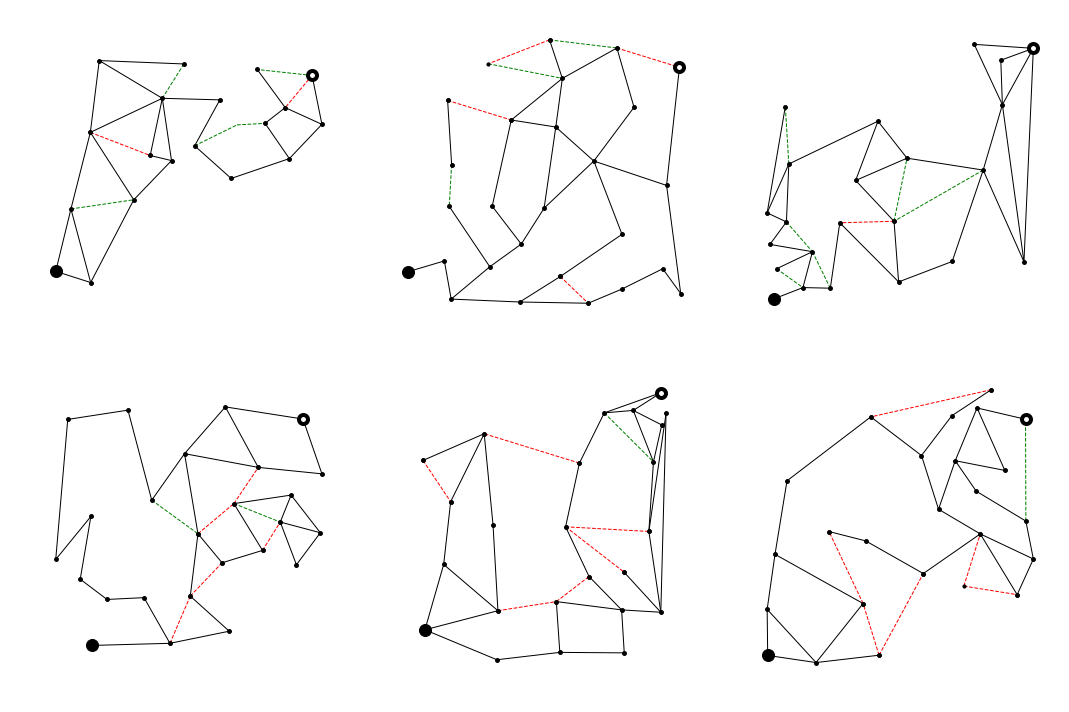

In [4]:
draw_lot_of_graphs(2,3)

# Experiments

One Experiment is defined by a type of map, a set of classifiers and a set of policies

In [5]:
from experiment import RandomDelaunayExperiment, all_classifier_samples

exp_config = {'description': 'Random triangulations test',
              'map': {
                  'type': 'delaunay', 
                  'number': 10,
                  'p_not_traversable': 0.5,
                  'n_hidden':7,
                  'size': 30,
                  'iters': 1
              },
              'classifier': {
                  'sigma': [0.5],
                  'samples': 1
              },
              'policy': {
                  'thresholds': [0, 0.5, 1]
              }
             }

exp = RandomDelaunayExperiment('test', exp_config, save=False, pool=1)

# Sample a graph

An experiment repeatedly samples a planning instance made by
    - a graph
    - source and target nodes
    - a list of hidden states
    - a realization

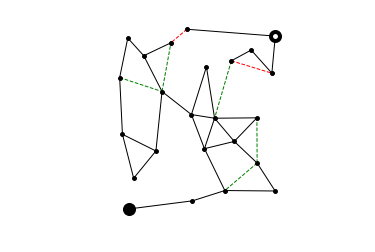

In [6]:
realization, planner, sources = exp.sample(0)
draw_random_graph(planner._graph, sources[0], planner.target, planner._graph.pos,
                  planner.hidden_state, realization, None, None)

# Compute all policy cost using classifiers

For a planning instance, we compute the competitive ration of all policies when using all classifiers

In [7]:
classifiers = exp_config['classifier']
policies = exp_config['policy']

all_classifier_samples(realization, planner, sources=sources,
                       classifier_config=classifiers,
                       policy_config=policies)

,source,sigma,gamma,classification,optimal,optimistic@0,optimistic@0.5,optimistic@1
0,23,0.5,0.5,"(0.5065180769582918, 0.5022569920947927, 0.453...",1.0,1.0,1.616808,1.616808


which is the same as the experiment method

In [8]:
exp.compute_sample(2)

,source,sigma,gamma,classification,optimal,optimistic@0,optimistic@0.5,optimistic@1
0,13,0.5,0.5,"(0.7236305538966901, 0.8766841699280065, 0.814...",1.0,1.0,1.0,1.0


that is applied to all maps to compute the final result.

In [9]:
exp.compute()

Experiment test: 100%|██████████| 10/10 [00:01<00:00,  4.90it/s]


,source,sigma,gamma,classification,optimal,optimistic@0,optimistic@0.5,optimistic@1
0,7,0.5,0.5,"(0.07610183874778384, 0.20436304383422524, 0.4...",1.000000,1.041049,1.000000,1.000000
0,13,0.5,0.5,"(0.021370233406080165, 0.05529279770090899, 0....",1.000000,1.000000,1.000000,1.000000
0,13,0.5,0.5,"(0.7236305538966901, 0.8766841699280065, 0.814...",1.000000,1.000000,1.000000,1.000000
0,3,0.5,0.5,"(0.4628062660073988, 0.9081666166146267, 0.021...",1.004756,1.004756,1.000000,1.000000
0,12,0.5,0.5,"(0.11183335478501022, 0.7239648146355693, 0.32...",1.000000,1.000000,1.000000,1.000000
0,26,0.5,0.5,"(0.42585361368565144, 0.5272256167357345, 0.04...",1.124335,1.124335,1.000000,1.000000
0,28,0.5,0.5,"(0.5137725259780168, 0.52454806919989, 0.68179...",1.023914,1.179578,1.000000,1.023914
0,6,0.5,0.5,"(0.7119355024126034, 0.673954981551366, 0.4684...",1.411316,1.462192,1.411316,1.022744
0,27,0.5,0.5,"(0.4711612777875622, 0.8225307375450609, 0.933...",1.000000,1.152569,1.000000,1.096129
0,27,0.5,0.5,"(0.17010047500770334, 0.47862117284173594, 0.6...",1.000000,1.465450,1.000000,1.000000
